In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
import random
seed = 42
random.seed(seed)
import numpy as np
np.random.seed(seed)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
columns_name = df.columns.to_list()
columns_name =['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age_day',
 'Concrete_compressive_strength']
df.columns = columns_name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age_day                        1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.shape

(1030, 9)

<AxesSubplot:>

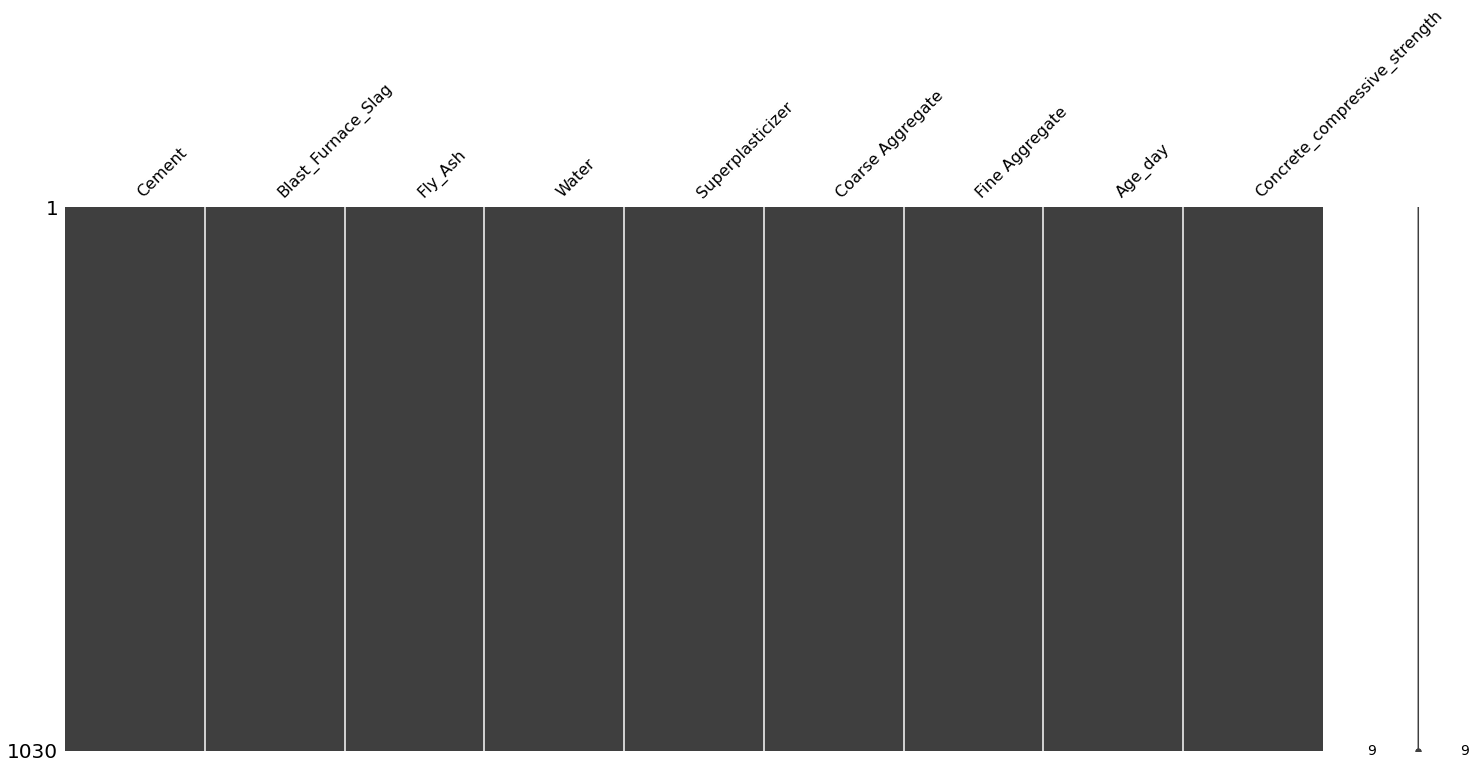

In [6]:
!pip -q install missingno
import missingno as ms
ms.matrix(df)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast_Furnace_Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age_day,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.corr()['Concrete_compressive_strength']

Cement                           0.497832
Blast_Furnace_Slag               0.134829
Fly_Ash                         -0.105755
Water                           -0.289633
Superplasticizer                 0.366079
Coarse Aggregate                -0.164935
Fine Aggregate                  -0.167241
Age_day                          0.328873
Concrete_compressive_strength    1.000000
Name: Concrete_compressive_strength, dtype: float64

<AxesSubplot:>

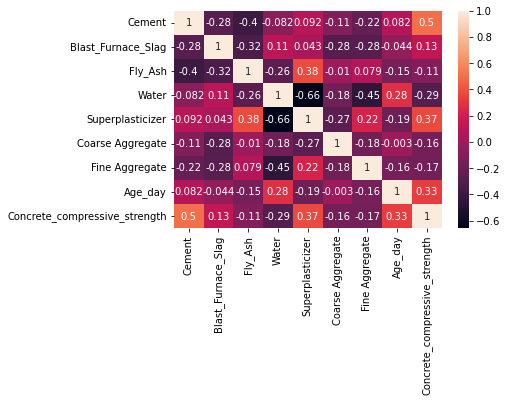

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Water', ylabel='Cement'>

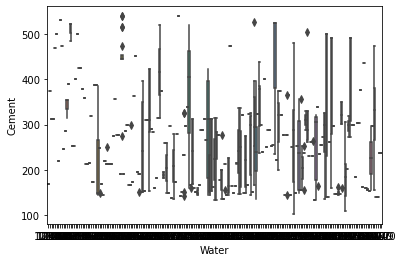

In [10]:
sns.boxplot(x='Water', y = 'Cement',data=df)

<AxesSubplot:xlabel='Water', ylabel='Cement'>

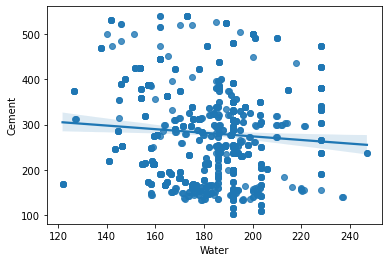

In [11]:
sns.regplot(x='Water', y = 'Cement',data=df)

As we can see from the above cell there is not correlation between **water** and our target variable.

<AxesSubplot:xlabel='Age_day', ylabel='Cement'>

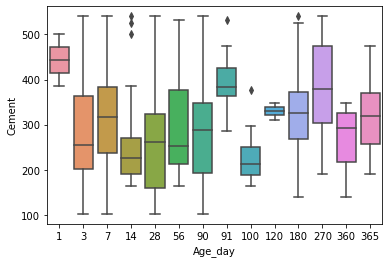

In [12]:
sns.boxplot(x='Age_day', y = 'Cement',data=df)

<AxesSubplot:xlabel='Age_day', ylabel='Cement'>

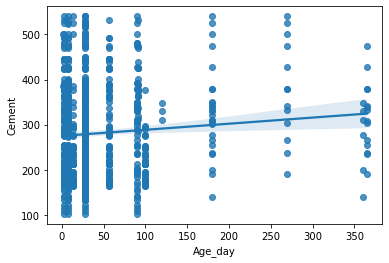

In [13]:
sns.regplot(x='Age_day', y = 'Cement',data=df)

In [14]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age_day,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Text(-0.04, -0.6, 'Concrete Compressive Strength')

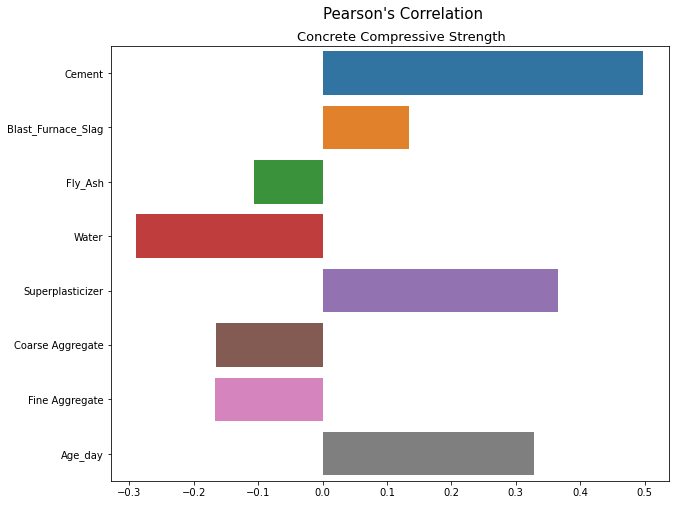

In [15]:
corr = df.corr(method='spearman').index[:-1]
features = df.corr().Concrete_compressive_strength.values[:-1]

plt.figure(figsize=(10, 8))
sns.barplot(features, corr)
# plt.title("Spearman Rank Correlation")
plt.text(0, -1, "Pearson's Correlation", fontdict={'fontsize':15})
plt.text(-0.04, -0.6, "Concrete Compressive Strength", fontdict={'fontsize':13})

In [16]:
X = df.drop('Concrete_compressive_strength',axis=1)
y = df.Concrete_compressive_strength

In [17]:
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete_compressive_strength, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [20]:
X_train.shape ,y_train.shape

((824, 8), (824,))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale = StandardScaler()

# note we have to fit_transform only on the training data. On your test data  you only have to transform.
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [23]:
X_train

array([[-1.16087734,  0.85738747,  0.9824489 , ..., -0.25746155,
        -0.64752011, -0.27567315],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 , -0.27567315],
       [-0.0768653 , -0.85558366,  1.06687429, ...,  1.01785948,
         0.06662828, -0.68931339],
       ...,
       [-0.86591441, -0.85558366,  1.12628475, ...,  1.34082214,
         0.33103616,  0.91561074],
       [ 1.78316909,  0.51111191, -0.83113361, ..., -1.54422615,
         0.11605031, -0.27567315],
       [ 0.28509237, -0.85558366,  0.9355459 , ..., -0.6172979 ,
         0.13458358, -0.27567315]])

# Model creation

### Linear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
pred_lr = lr.predict(X_test)
pred_lr[:10]

array([59.65804162, 52.0412113 , 63.53513339, 51.57545676, 17.22001733,
       39.86561321, 26.6982471 , 44.73648869, 29.36619785, 38.18612542])

In [26]:
print(f'Mean absolute error of linear regression is {mean_absolute_error(y_test,pred_lr)}')
print(f'R2 score of Linear Regression is {r2_score(y_test,pred_lr)}')

Mean absolute error of linear regression is 7.7455592439214325
R2 score of Linear Regression is 0.6275531792314851


In [27]:
r2_score(y_test, pred_lr)

0.6275531792314851

### Decision tree Regression

In [28]:
dt = DecisionTreeRegressor(criterion='mae')
dt.fit(X_train,y_train)

pred_dt = dt.predict(X_test)
print(f'Mean absolute error of linear regression is {mean_absolute_error(y_test,pred_dt)}')
print(f'R2 score of Decision tree regressor is {r2_score(y_test,pred_dt)}')

Mean absolute error of linear regression is 5.192572815533981
R2 score of Decision tree regressor is 0.7420712919921237


### Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# prediction
pred_rf = rf.predict(X_test)

print(f'Mean absolute error of Random forst regression is {mean_absolute_error(y_test,pred_rf)}')
print(f'R2 score of Random forst regressor is {r2_score(y_test,pred_rf)}')

Mean absolute error of Random forst regression is 3.733492581484051
R2 score of Random forst regressor is 0.884675043139661
